In [3]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV


from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt

In [4]:
cleaned_dataset = pd.read_csv("cleaned_tripadvisor.csv")

In [5]:
# Cheking data frame shape
display(cleaned_dataset.shape)
#Checking if there is a null value
display(cleaned_dataset.isnull().sum().sum())
#Checking column names
#df.columns

(147579, 7)

0

In [6]:
cleaned_dataset.head()

,rating_review,review_full,word_count,parsedclean_review,clean_title_lemmat,clean_title_lancast,clean_title_port
0,5,"Totally in love with the Auro of the place, re...","{'Totally': 1, 'in': 3, 'love': 1, 'with': 2, ...",totally love auro place really beautiful quite...,totally love auro place really beautiful quite...,tot lov auro plac real beauty quit fant tim am...,total love auro place realli beauti quit fanci...
1,5,I went this bar 8 days regularly with my husba...,"{'I': 1, 'went': 1, 'this': 1, 'bar': 1, '8': ...",went bar days regularly husband fully satisfie...,went bar day regularly husband fully satisfied...,went bar day regul husband ful satisfy serv st...,went bar day regularli husband fulli satisfi s...
2,5,We were few friends and was a birthday celebra...,"{'We': 2, 'were': 1, 'few': 1, 'friends': 1, '...",friends birthday celebration food good taste r...,friend birthday celebration food good taste re...,friend birthday celebr food good tast real fre...,friend birthday celebr food good tast realli f...
3,5,Fatjar Cafe and Market is the perfect place fo...,"{'Fatjar': 1, 'Cafe': 1, 'and': 4, 'Market': 1...",fatjar cafe market perfect place casual lunch ...,fatjar cafe market perfect place casual lunch ...,fatj caf market perfect plac cas lunch lov on ...,fatjar cafe market perfect place casual lunch ...
4,5,"Hey Guys, if you are craving for pizza and sea...","{'Hey': 1, 'Guys,': 1, 'if': 1, 'you': 3, 'are...",hey guys craving pizza searching visit cafe ye...,hey guy craving pizza searching visit cafe yes...,hey guy crav pizz search visit caf ye high rec...,hey guy crave pizza search visit cafe ye highl...


In [18]:
from collections import Counter
p = Counter(" ".join(cleaned_dataset['parsedclean_review']).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

         Word  Frequency
0        food     139748
1        good      96525
2       place      90804
3     service      57036
4  restaurant      50769
5       great      44393
6         one      42757
7     chicken      36319
8       staff      30850
9        also      30631


### Baseline Accuracy

In [7]:

cleaned_dataset['rating_review'].value_counts(normalize=1)[0:1]  # value and pct

5    0.49051
Name: rating_review, dtype: float64

## Features List

In [8]:
feat_title = ['review_full']
feat_clean_title = ['parsedclean_review'] 
feat_tit_lemma = ['clean_title_lemmat'] ## Highest Scores
feat_tit_landcast = ['clean_title_lancast'] 
feat_tit_port = ['clean_title_port'] 
features = feat_tit_lemma 

In [9]:
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147579 entries, 0 to 147578
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   rating_review        147579 non-null  int64 
 1   review_full          147579 non-null  object
 2   word_count           147579 non-null  object
 3   parsedclean_review   147579 non-null  object
 4   clean_title_lemmat   147579 non-null  object
 5   clean_title_lancast  147579 non-null  object
 6   clean_title_port     147579 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.0+ MB


## Split Test

In [21]:
#Preparing data
X = cleaned_dataset[features].iloc[:,0]
y = cleaned_dataset['rating_review']
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=15)

In [26]:
cv = CountVectorizer()
model_mult_nb = MultinomialNB()
alphas = np.linspace(0,2,20)[1:]

pipe = Pipeline([('cv',cv),
                ('model',model_mult_nb)
])

In [27]:
params = {'cv__stop_words': [['food','place',]],
          'cv__max_features':[4000,5000,6000,None],
          'cv__ngram_range': [(1,1)],
          'cv__min_df': [1,5,10,15],
          'cv__max_df':[0.10,0.15,0.2,0.3],
          'model__alpha' : alphas
    }
gs = GridSearchCV(pipe, param_grid=params,cv=5)
print(gs.fit(X_train,y_train))
print(gs.best_params_)
print("Train Score: ", round(gs.best_score_,4))
print("Train Score: ", round(gs.score(X_test,y_test),4))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'cv__max_df': [0.1, 0.15, 0.2, 0.3],
                         'cv__max_features': [4000, 5000, 6000, None],
                         'cv__min_df': [1, 5, 10, 15],
                         'cv__ngram_range': [(1, 1)],
                         'cv__stop_words': [['food', 'place']],
                         'model__alpha': array([0.10526316, 0.21052632, 0.31578947, 0.42105263, 0.52631579,
       0.63157895, 0.73684211, 0.84210526, 0.94736842, 1.05263158,
       1.15789474, 1.26315789, 1.36842105, 1.47368421, 1.57894737,
       1.68421053, 1.78947368, 1.89473684, 2.        ])})
{'cv__max_df': 0.3, 'cv__max_features': None, 'cv__min_df': 1, 'cv__ngram_range': (1, 1), 'cv__stop_words': ['food', 'place'], 'model__alpha': 0.9473684210526315}
Train Score:  0.6247
Train Score:  0.629


## Other Models:

### MultinomialNB 

In [31]:
cv = CountVectorizer()
model_mult_nb = MultinomialNB()
params = {'cv__stop_words': [['food','place']]}
gs = GridSearchCV(pipe, param_grid=params,cv=5)
print(gs.fit(X_train,y_train))
print(gs.best_params_)
print("Train Score: ", round(gs.best_score_,4))
print("Train Score: ", round(gs.score(X_test,y_test),4))

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cv', CountVectorizer()),
                                       ('model', MultinomialNB())]),
             param_grid={'cv__stop_words': [['food', 'place']]})
{'cv__stop_words': ['food', 'place']}
Train Score:  0.628
Train Score:  0.6317


### Random Forest

In [32]:
vectorizer = CountVectorizer(stop_words=['food','place'])
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_vec,y_train)
print("Cross Val Score: ",cross_val_score(rf,X_train_vec,y_train,cv=5).mean())
print("Train Score: ", round(rf.score(X_train_vec,y_train),4))
print("Train Score: ", round(rf.score(X_test_vec,y_test),4))


Cross Val Score:  0.599056774762294
Train Score:  0.9998
Train Score:  0.6024


### Extra Trees

In [33]:
vectorizer = CountVectorizer(stop_words=['food','place'])
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
et = ExtraTreesClassifier(random_state=42)
et.fit(X_train_vec,y_train)
print("Cross Val Score: ",cross_val_score(rf,X_train_vec,y_train,cv=5).mean())
print("Train Score: ", round(et.score(X_train_vec,y_train),4))
print("Test Score: ", round(et.score(X_test_vec,y_test),4))

Cross Val Score:  0.599056774762294
Train Score:  0.9998
Test Score:  0.6038


### Baggin Classifier

In [34]:
vectorizer = CountVectorizer(stop_words=['food','place'])
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

bagged = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42)
                            ,max_samples=0.5, max_features=0.5)
bagged.fit(X_train_vec,y_train)
print("Cross Val Score: ",cross_val_score(bagged,X_train_vec,y_train,cv=5).mean())
print("Train Score: ",bagged.score(X_train_vec,y_train))
print("Test Score: ",bagged.score(X_test_vec,y_test))
                             

Cross Val Score:  0.5745907368999361
Train Score:  0.9040602074373894
Test Score:  0.57780187017211


### Tuning Random Forest

In [38]:
vectorizer = CountVectorizer(stop_words=['food','place'])
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model__max_features = ['auto',0.75,0.8,0.4]
model__max_depth = [65,66,67,68,69,70]#,200]
model__criterion = ['gini', 'entropy']
sample_leaf_options = [1,5,10,50,100,200,500]
results = []
for crit in model__criterion:
    for feat in model__max_features:
        for depth in model__max_depth:
            print(crit, feat,depth) ## min_samples_leaf=model_min_samples_leaf,n_estimators = [20] 
            et = ExtraTreesClassifier(random_state=42, criterion=crit,max_depth=depth,max_features=feat)
            rf = RandomForestClassifier(n_estimators = 10,random_state=42, criterion=crit,max_depth=depth,max_features=feat
                                       ,min_samples_leaf = 1)
            rf.fit(X_train_vec,y_train)
            cv_score = round(cross_val_score(rf,X_train_vec,y_train,cv=5).mean(),5)
            train_score = round(rf.score(X_train_vec,y_train),5)
            test_score = round(rf.score(X_test_vec,y_test),5)            
            results.append([crit,feat,depth,cv_score,train_score,test_score])

gini auto 65
gini auto 66
gini auto 67
gini auto 68
gini auto 69
gini auto 70
gini 0.75 65
gini 0.75 66
gini 0.75 67
gini 0.75 68
gini 0.75 69
gini 0.75 70
gini 0.8 65
gini 0.8 66
gini 0.8 67
gini 0.8 68
gini 0.8 69
gini 0.8 70
gini 0.4 65
gini 0.4 66
gini 0.4 67
gini 0.4 68
gini 0.4 69
gini 0.4 70
entropy auto 65
entropy auto 66
entropy auto 67
entropy auto 68
entropy auto 69
entropy auto 70
entropy 0.75 65
entropy 0.75 66
entropy 0.75 67
entropy 0.75 68
entropy 0.75 69
entropy 0.75 70
entropy 0.8 65
entropy 0.8 66
entropy 0.8 67
entropy 0.8 68
entropy 0.8 69
entropy 0.8 70
entropy 0.4 65
entropy 0.4 66
entropy 0.4 67
entropy 0.4 68
entropy 0.4 69
entropy 0.4 70


In [41]:
results

[['gini', 'auto', 65, 0.54753, 0.73855, 0.54837],
 ['gini', 'auto', 66, 0.54711, 0.74191, 0.54875],
 ['gini', 'auto', 67, 0.54696, 0.7492, 0.54983],
 ['gini', 'auto', 68, 0.54769, 0.75201, 0.55246],
 ['gini', 'auto', 69, 0.5489, 0.75262, 0.5527],
 ['gini', 'auto', 70, 0.54845, 0.75847, 0.55289],
 ['gini', 0.75, 65, 0.58663, 0.88879, 0.5881],
 ['gini', 0.75, 66, 0.58578, 0.89267, 0.58775],
 ['gini', 0.75, 67, 0.58513, 0.89347, 0.58639],
 ['gini', 0.75, 68, 0.58421, 0.89649, 0.5874],
 ['gini', 0.75, 69, 0.58415, 0.89946, 0.58778],
 ['gini', 0.75, 70, 0.58485, 0.90208, 0.58848],
 ['gini', 0.8, 65, 0.58586, 0.88827, 0.58672],
 ['gini', 0.8, 66, 0.58419, 0.89222, 0.58588],
 ['gini', 0.8, 67, 0.58332, 0.89362, 0.58916],
 ['gini', 0.8, 68, 0.58422, 0.89535, 0.58769],
 ['gini', 0.8, 69, 0.58365, 0.89779, 0.58715],
 ['gini', 0.8, 70, 0.58459, 0.90165, 0.59068],
 ['gini', 0.4, 65, 0.58585, 0.88813, 0.58889],
 ['gini', 0.4, 66, 0.58628, 0.89016, 0.58981],
 ['gini', 0.4, 67, 0.58653, 0.8931, 0.591

### Runing Random forest with optimal HyperParameters

In [42]:
vectorizer = CountVectorizer(stop_words=['food','place'])
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
rf = RandomForestClassifier(random_state=42,criterion='entropy',max_features='auto',max_depth=70)
rf.fit(X_train_vec,y_train)
print("Cross Val Score: ",cross_val_score(rf,X_train_vec,y_train,cv=5).mean())
print("Train Score: ", round(rf.score(X_train_vec,y_train),4))
print("Test Score: ", round(rf.score(X_test_vec,y_test),4))

Cross Val Score:  0.5545878599833325
Train Score:  0.8037
Test Score:  0.5547


### Printing Random Forest top features:

In [43]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(0,20): # X_train_vec.shape[1]
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),new_train_df.iloc[:,indices[f]].name)

Feature ranking:
1. feature 4251 (0.015192) average
2. feature 23845 (0.010358) good
3. feature 1852 (0.006793) amazing
4. feature 4670 (0.006508) bad
5. feature 40361 (0.006267) ok
6. feature 6061 (0.005716) best
7. feature 19411 (0.005522) excellent
8. feature 24302 (0.005045) great
9. feature 15214 (0.004948) delicious
10. feature 39777 (0.004850) nothing
11. feature 44530 (0.004702) poor
12. feature 64673 (0.004149) worst
13. feature 6110 (0.003909) better
14. feature 42630 (0.003805) pathetic
15. feature 40825 (0.003744) ordered
16. feature 38252 (0.003716) must
17. feature 55275 (0.003676) staff
18. feature 51905 (0.003675) service
19. feature 58487 (0.003583) thanks
20. feature 39278 (0.003408) nice


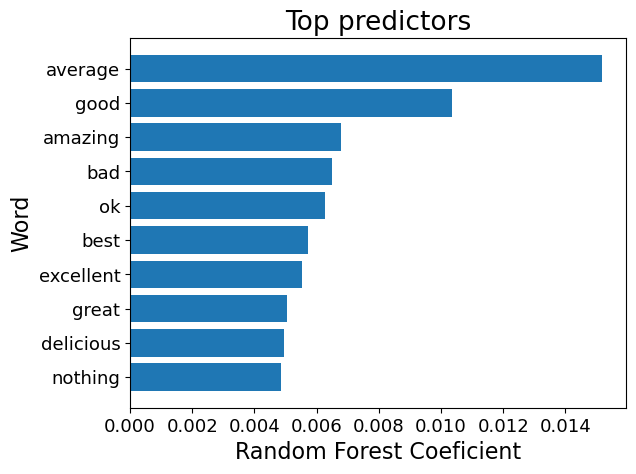

<Figure size 1300x1300 with 0 Axes>

In [44]:
# Make dataset
number_features_print = 10
height = [importances[indices[i]] for i in range(0,number_features_print)]
# bars = ['average', 'good', 'amazing', 'bad', 'ok','best','excellent','great', 'delicious', 'nothing']
bars = [new_train_df.iloc[:,indices[x]].name for x in range(0,number_features_print)]


height.reverse()
bars.reverse()

y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)
plt.title('Top predictors',fontsize=19)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Word', fontsize = 16)
plt.xlabel('Random Forest Coeficient', fontsize = 16)
plt.figure(figsize=(13, 13))

# Show graphic
plt.show();


## Result

1. Adjective words were the ones with most impact in this model´s classification process.
2. The Random Forest Cassifier had a 91% accuracy in train set and 59% accuracy in test and 59% cross validation after hyperparameter tuning.
3. Hyper parameter tuning didn't show any improvement in scores compared to the default options. A 0.04 decline in cross validation and test training scores while training score of training data decreased by 0.1 .